# Analysez des données de systèmes éducatifs

Importation des modules nécessaires à notre analyse.

In [1]:
import pandas as pd
import numpy as np
import scipy

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import missingno as msno

import pygal

In [2]:
print('pandas version : ', pd.__version__, '\n')
print('numpy version : ', np.__version__, '\n')
print('scipy version : ', scipy.__version__, '\n')
print('matplotlib version : ', matplotlib.__version__, '\n')
print('seaborn version : ', sns.__version__, '\n')
print('missingno version : ', msno.__version__, '\n')
print('pygal version : ', pygal.__version__)

pandas version :  1.2.4 

numpy version :  1.20.1 

scipy version :  1.6.2 

matplotlib version :  3.3.4 

seaborn version :  0.11.1 

missingno version :  0.5.0 

pygal version :  2.4.0


Importation et première analyse des jeux de données.

In [3]:
ed_stats_data = pd.read_csv('EdStatsData.csv')
ed_stats_country = pd.read_csv('EdStatsCountry.csv')
ed_stats_country_series = pd.read_csv('EdStatsCountry-Series.csv')
ed_stats_footnote = pd.read_csv('EdStatsFootNote.csv')
ed_stats_series = pd.read_csv('EdStatsSeries.csv')

In [4]:
liste_df = [ed_stats_data, ed_stats_country, ed_stats_country_series, ed_stats_footnote, ed_stats_series]

for df in liste_df:
    print(df.shape,'\n')
    print(df.columns)

(886930, 70) 

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')
(241, 32) 

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 

Dans un premier temps, nous allons garder les données numériques de *ed_stats_data* comprises entre 1970 et 2030.  A la lecture des colonnes des autres jeux de données, nous n'allons garder que les colonnes "Region", "Country Code" et "Income Group" de *ed_stats_country*.

In [5]:
ed_stats_data_dropped = ed_stats_data.drop(columns = ['Indicator Code', '1970', '1971', '1972', '1973', '1974',\
                                                      '1975', '1976', '1977', '1978', '1979',\
                                                      '1980', '1981', '1982', '1983', '1984',\
                                                      '1985', '1986', '1987', '1988', '1989',\
                                                      '2035', '2040', '2045', '2050', '2055',\
                                                      '2060', '2065', '2070', '2075', '2080',\
                                                      '2085', '2090', '2095', '2100', 'Unnamed: 69'])

In [6]:
ed_stats_country_dropped = \
ed_stats_country.drop(columns = ['Short Name', 'Table Name', 'Long Name', '2-alpha code', 'Currency Unit',\
                                 'Special Notes', 'WB-2 code', 'National accounts base year',\
                                 'National accounts reference year', 'SNA price valuation',\
                                 'Lending category', 'Other groups', 'System of National Accounts',\
                                 'Alternative conversion factor', 'PPP survey year',\
                                 'Balance of Payments Manual in use', 'External debt Reporting status',\
                                 'System of trade', 'Government Accounting concept',\
                                 'IMF data dissemination standard', 'Latest population census',\
                                 'Latest household survey', 'Source of most recent Income and expenditure data',\
                                 'Vital registration complete', 'Latest agricultural census',\
                                 'Latest industrial data', 'Latest trade data',\
                                 'Latest water withdrawal data', 'Unnamed: 31'])

In [7]:
#On joint les deux jeux de données sur 'Country Code'

df_merged = ed_stats_data_dropped.merge(ed_stats_country_dropped, on = 'Country Code', how = 'left')

print(df_merged.columns, '\n')
print(df_merged.shape)

Index(['Country Name', 'Country Code', 'Indicator Name', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020',
       '2025', '2030', 'Region', 'Income Group'],
      dtype='object') 

(886930, 36)


## Choix des indicateurs et gestion des données manquantes

En allant sur le site de la Banque Mondiale, nous avons décidé de garder 5 indicateurs :
- Personal computers (per 100 people),
- Government expenditure on education as % of GDP (%),
- Enrolment in secondary education, both sexes (number),
- Internet users (per 100 people),
- Enrolment in tertiary education, all programmes, both sexes (number).

In [8]:
df_merged = df_merged.set_index('Indicator Name')

In [9]:
df_merged = df_merged.loc[["Personal computers (per 100 people)",\
                           "Government expenditure on education as % of GDP (%)",\
                           "Enrolment in secondary education, both sexes (number)",\
                           "Internet users (per 100 people)",\
                           "Enrolment in tertiary education, all programmes, both sexes (number)"],:] 

In [10]:
df_merged.reset_index(inplace=True)
df_merged['Indicator Name'].unique()

array(['Personal computers (per 100 people)',
       'Government expenditure on education as % of GDP (%)',
       'Enrolment in secondary education, both sexes (number)',
       'Internet users (per 100 people)',
       'Enrolment in tertiary education, all programmes, both sexes (number)'],
      dtype=object)

Vérifions si nous avons des duplicatas dans nos données.

In [11]:
df_merged.duplicated().sum()

0

Voyons maintenant combien de données manquantes nous avons dans notre jeu de données :

In [12]:
print(df_merged.info(),'\n')
print(df_merged.isnull().mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Name  1210 non-null   object 
 1   Country Name    1210 non-null   object 
 2   Country Code    1210 non-null   object 
 3   1990            666 non-null    float64
 4   1991            488 non-null    float64
 5   1992            502 non-null    float64
 6   1993            522 non-null    float64
 7   1994            575 non-null    float64
 8   1995            644 non-null    float64
 9   1996            673 non-null    float64
 10  1997            618 non-null    float64
 11  1998            713 non-null    float64
 12  1999            856 non-null    float64
 13  2000            852 non-null    float64
 14  2001            870 non-null    float64
 15  2002            889 non-null    float64
 16  2003            864 non-null    float64
 17  2004            892 non-null    f

<AxesSubplot:>

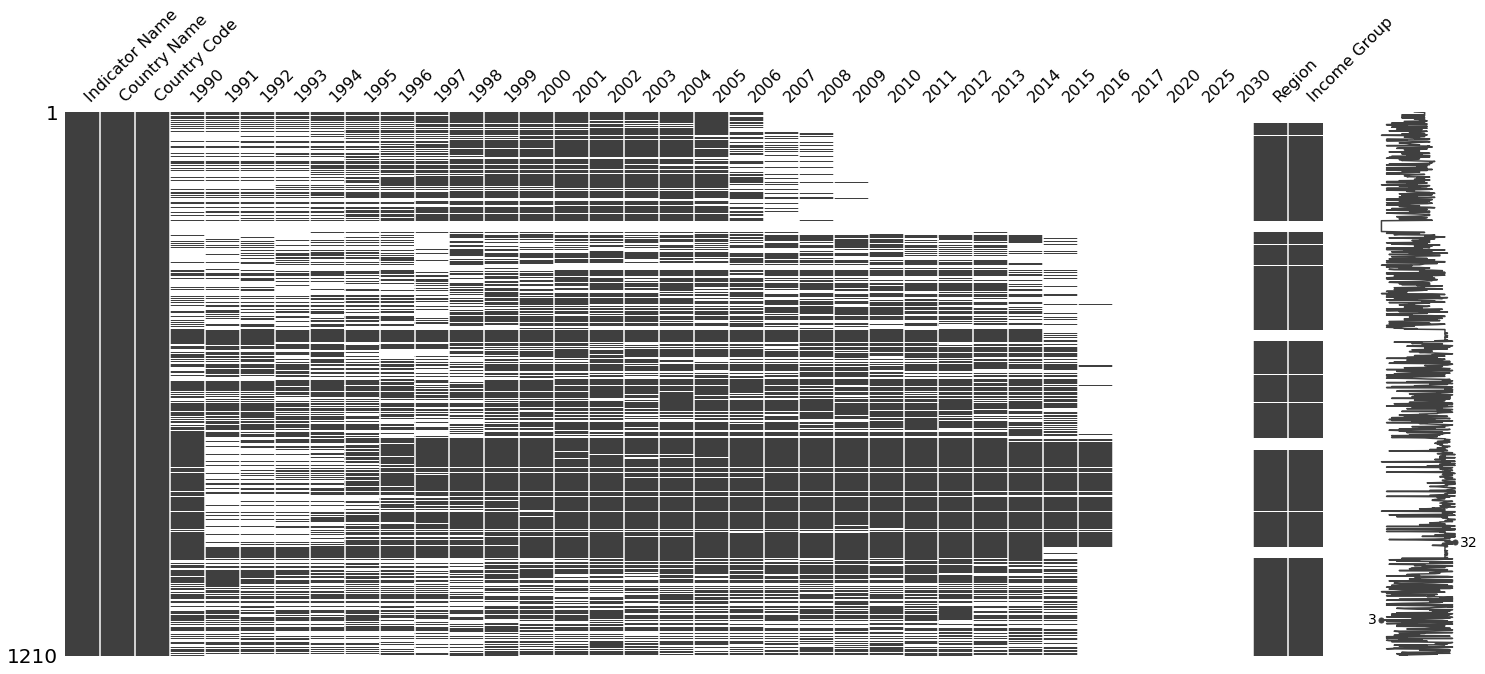

In [13]:
msno.matrix(df_merged)

Nous allons supprimer les colonnes de 1990 à 1999 car l'indicateur "Internet users (per 100 people)" aurait peu d'intérêt ainsi que les colonnes de 2016 à 2030.

Nous en profitons pour supprimer "Country Code" que nous n'allons plus utiliser.

In [14]:
df_merged = df_merged.drop(columns = ['Country Code', '1990', '1991','1992', '1993', '1994',\
                                      '1995', '1996','1997','1998','1999','2016', '2017', '2020',\
                                      '2025', '2030'])

In [15]:
print(df_merged.info(),'\n')
print(df_merged.isnull().mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Name  1210 non-null   object 
 1   Country Name    1210 non-null   object 
 2   2000            852 non-null    float64
 3   2001            870 non-null    float64
 4   2002            889 non-null    float64
 5   2003            864 non-null    float64
 6   2004            892 non-null    float64
 7   2005            868 non-null    float64
 8   2006            779 non-null    float64
 9   2007            727 non-null    float64
 10  2008            716 non-null    float64
 11  2009            692 non-null    float64
 12  2010            696 non-null    float64
 13  2011            698 non-null    float64
 14  2012            681 non-null    float64
 15  2013            666 non-null    float64
 16  2014            627 non-null    float64
 17  2015            513 non-null    f

Regardons le noms des pays des valeurs manquantes de la colonne "Region", elles ont l'air de suivre un pattern.

In [16]:
df_merged[df_merged['Region'].isnull()]['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'British Virgin Islands',
       'Gibraltar', 'Nauru'], dtype=object)

On peut remarquer que les valeurs manquantes ne correspondent pas à des pays à proprement parler mais à des zones géographiques et à des petits territoires.  Nous supprimons toutes ces lignes.

In [17]:
df_merged = df_merged.dropna(subset=['Region'], axis=0)

Nous préparons aussi une liste de nos années afin d'avoir accès à nos colonnes numériques.

In [18]:
liste_annees = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',\
                '2011','2012','2013','2014','2015']

Occupons nous maintenant de remplacer nos valeurs manquantes en interpolant les données déjà présentent dans chacune de nos lignes.

In [19]:
df_merged.reset_index(inplace=True)

In [20]:
df_no_nan = df_merged.loc[:,liste_annees].interpolate(method = 'linear', axis = 1, limit_direction = 'forward')
df_no_nan = df_no_nan.loc[:,liste_annees].interpolate(method = 'linear', axis = 1, limit_direction = 'backward')

In [21]:
for annee in liste_annees:
    df_merged[annee] = df_no_nan[annee]

<AxesSubplot:>

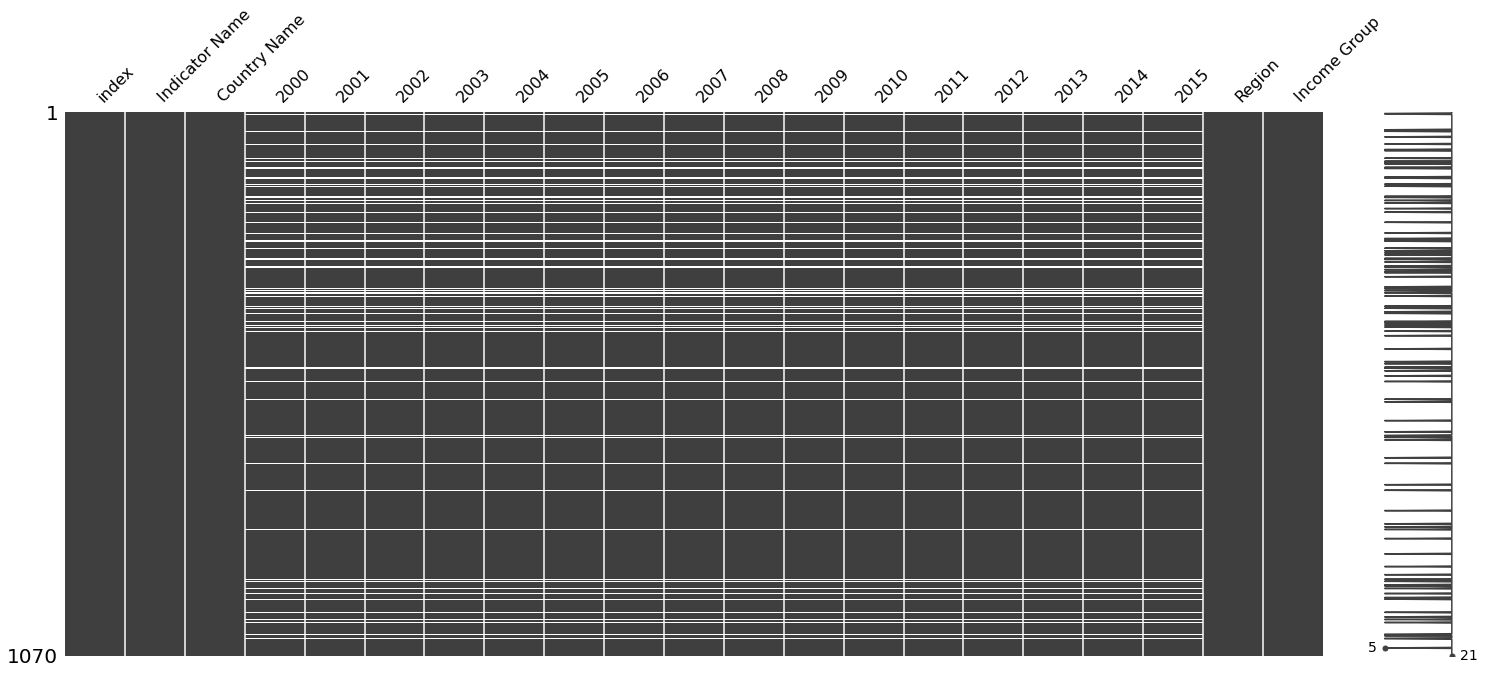

In [22]:
msno.matrix(df_merged)

Il ne reste que des lignes de données complétements vides, nous les gardons pour le moment.  

Nous crééons une copie de *df_merged* pour notre analyse.

In [23]:
df_inter = df_merged.copy()

Nous crééons des sous-dataframes pour chacun de nos indicateurs.

In [24]:
subset_computers = df_merged.copy()
subset_gov = df_merged.copy()
subset_secondary = df_merged.copy()
subset_internet = df_merged.copy()
subset_tertiary = df_merged.copy()

In [25]:
subset_computers.set_index('Indicator Name', inplace = True)
subset_computers = subset_computers.loc['Personal computers (per 100 people)']
subset_computers.reset_index(inplace = True)
subset_computers.set_index('Country Name', inplace = True)
subset_computers = subset_computers.drop(columns = ['index','Indicator Name', 'Region', 'Income Group'])

In [26]:
subset_gov.set_index('Indicator Name', inplace = True)
subset_gov = subset_gov.loc['Government expenditure on education as % of GDP (%)']
subset_gov.reset_index(inplace = True)
subset_gov.set_index('Country Name', inplace = True)
subset_gov = subset_gov.drop(columns = ['index','Indicator Name', 'Region', 'Income Group'])

In [27]:
subset_secondary.set_index('Indicator Name', inplace = True)
subset_secondary = subset_secondary.loc['Enrolment in secondary education, both sexes (number)']
subset_secondary.reset_index(inplace = True)
subset_secondary.set_index('Country Name', inplace = True)
subset_secondary = subset_secondary.drop(columns = ['index','Indicator Name', 'Region', 'Income Group'])

In [28]:
subset_internet.set_index('Indicator Name', inplace = True)
subset_internet = subset_internet.loc['Internet users (per 100 people)']
subset_internet.reset_index(inplace = True)
subset_internet.set_index('Country Name', inplace = True)
subset_internet = subset_internet.drop(columns = ['index','Indicator Name', 'Region', 'Income Group'])

In [29]:
subset_tertiary.set_index('Indicator Name', inplace = True)
subset_tertiary = subset_tertiary.loc['Enrolment in tertiary education, all programmes, both sexes (number)']
subset_tertiary.reset_index(inplace = True)
subset_tertiary.set_index('Country Name', inplace = True)
subset_tertiary = subset_tertiary.drop(columns = ['index','Indicator Name', 'Region', 'Income Group'])

In [30]:
subsets = [subset_computers, subset_gov, subset_secondary, subset_internet, subset_tertiary]

Nous allons créer une colonne "Moyenne" pour chacun de nos indicateurs.

In [31]:
for subset in subsets:
    subset['Moyenne'] = subset.mean(axis=1)
    
subset_computers.rename(columns = {'Moyenne':'Moyenne computers'}, inplace = True)
subset_gov.rename(columns = {'Moyenne':'Moyenne depenses'}, inplace = True)
subset_secondary.rename(columns = {'Moyenne':'Moyenne secondary'}, inplace = True)
subset_internet.rename(columns = {'Moyenne':'Moyenne internet'}, inplace = True)
subset_tertiary.rename(columns = {'Moyenne':'Moyenne tertiary'}, inplace = True)

Maintenant, nous mettons en place un jeu de données avec la valeur moyenne de chaque indicateur pour chaque pays.

In [32]:
df_agrege = subset_computers[['Moyenne computers']].copy()

df_agrege['Moyenne depenses'] = subset_gov['Moyenne depenses']
df_agrege['Moyenne secondary'] = subset_secondary['Moyenne secondary']
df_agrege['Moyenne internet'] = subset_internet['Moyenne internet']
df_agrege['Moyenne tertiary'] = subset_tertiary['Moyenne tertiary']

Avant de pouvoir utiliser scipy.stats.percentileofscore qui va nous servir pour la création de notre score, nous devons nous occuper de nos dernières valeurs manquantes.

In [33]:
df_test = df_agrege.copy()

Regardons le nombre de lignes restantes selon le threshold (le nombre de valeurs non nulles) que nous imposons.

In [34]:
for val in range(6):
    df_test.dropna(axis=0, thresh = val, inplace = True)
    print("Avec un threshold de",val,"le dataframe aurait {} lignes".format(df_test.shape[0]))

Avec un threshold de 0 le dataframe aurait 214 lignes
Avec un threshold de 1 le dataframe aurait 209 lignes
Avec un threshold de 2 le dataframe aurait 205 lignes
Avec un threshold de 3 le dataframe aurait 200 lignes
Avec un threshold de 4 le dataframe aurait 188 lignes
Avec un threshold de 5 le dataframe aurait 164 lignes


<AxesSubplot:>

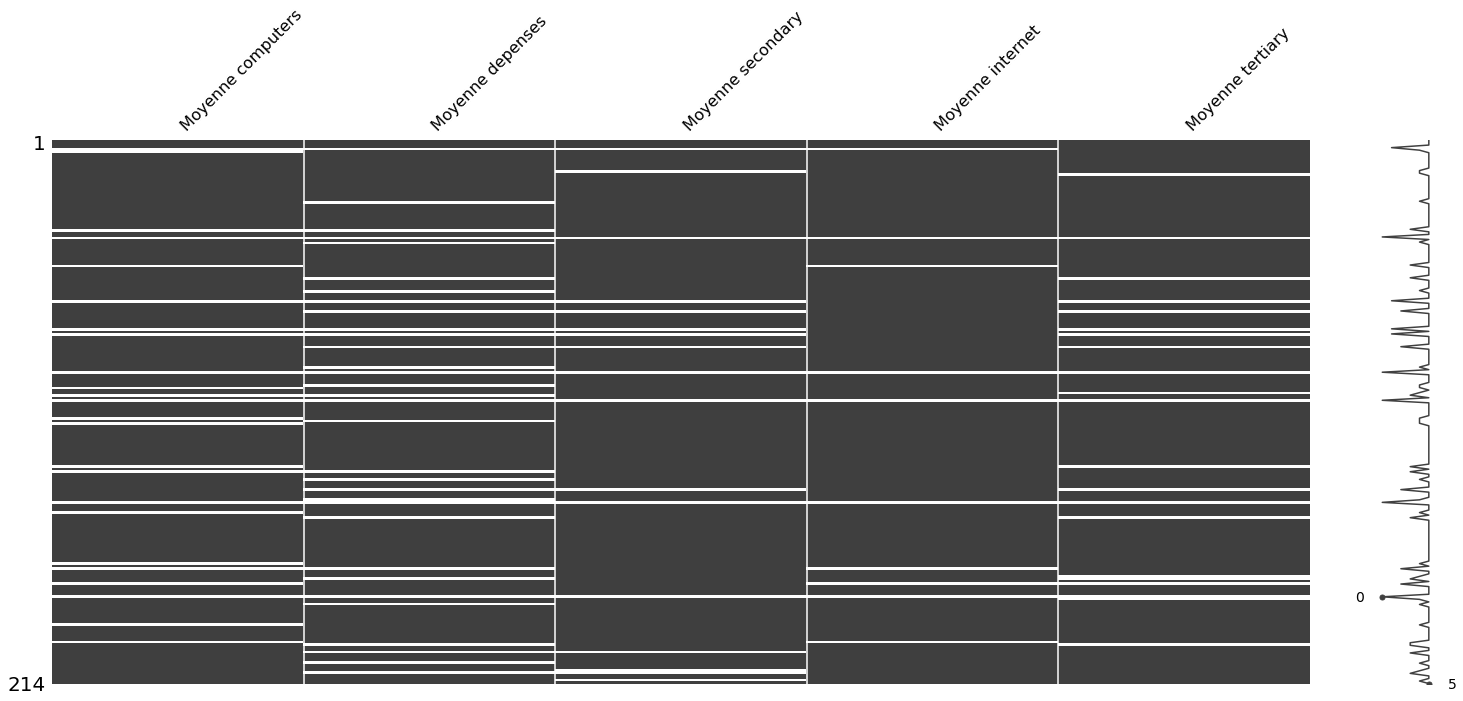

In [35]:
msno.matrix(df_agrege)

In [36]:
series_null = df_agrege[df_agrege!=0].isnull().sum(axis=1)
series_null = series_null[series_null >0]
print(series_null,'\n')
print(len(series_null))

Country Name
American Samoa                    4
Andorra                           1
Azerbaijan                        1
Bahamas, The                      1
Bosnia and Herzegovina            1
Cayman Islands                    2
Channel Islands                   5
China                             1
Curacao                           2
Dominica                          2
Equatorial Guinea                 1
Faroe Islands                     4
French Polynesia                  3
Greenland                         4
Guam                              4
Haiti                             3
Iraq                              1
Isle of Man                       5
Jordan                            1
Kazakhstan                        1
Kiribati                          1
Korea, Dem. People’s Rep.         3
Kosovo                            5
Liberia                           1
Libya                             1
Liechtenstein                     1
Monaco                            2
Montenegro     

Nous décidons de supprimer tous ces pays.  Il s'agit de petits territoires ou de territoires où il serait très compliqué de s'implanter (ex : la Chine).

In [37]:
null = pd.DataFrame(series_null)
null.reset_index(inplace = True)

for subset in subsets:
    subset.reset_index(inplace = True)
    subset['Country Name'] = subset[~subset['Country Name'].isin(null['Country Name'])]
    subset.dropna(inplace = True)

Vérifions si nos subsets ont le bon nombre de ligne après suppression des pays de *series_null* (164 lignes) :

In [38]:
for subset in subsets:
    print(subset.shape, '\n')

(164, 18) 

(164, 18) 

(164, 18) 

(164, 18) 

(164, 18) 



In [39]:
df_agrege.reset_index(inplace = True)

df_agrege.dropna(axis=0, thresh = 6, inplace=True)
df_agrege.shape

(164, 6)

## Création de notre score

In [40]:
def score(col):
    """
    Prend une colonne d'un dataframe et retourne une colonne avec des valeurs, entre 0 et 100, représentant
    le percentile associé à chaque valeur.
    
            Parameters:
                col (object): colonne de DataFrame
                
            Returns:
                x (list): liste représentant le percentile de chaque valeur de col
    """
    x = []
    for i in range(0,len(col)):
        xi = scipy.stats.percentileofscore(a = col, score = col[i], kind = 'rank')
        x.append(xi)
    return x

Nous remplaçons les valeurs de nos sous-dataframes (un par indicateur) par leur score afin d'avoir un score par pays, par année et cela pour chaque indicateur.

In [41]:
for subset in subsets:
    subset.set_index('Country Name', inplace = True)
    for annee in liste_annees:
        subset[annee] = score(subset[annee])

In [42]:
subset_tertiary.sort_values('2000', ascending = False).head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Moyenne tertiary
Country Name,,,,,,,,,,,,,,,,,
United States,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.390244,99.390244,99.390244,99.390244,99.390244,99.390244,1.798440e+07
India,99.390244,99.390244,99.390244,99.390244,99.390244,99.390244,99.390244,99.390244,99.390244,99.390244,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.841976e+07
Russian Federation,98.780488,98.780488,98.780488,98.780488,98.780488,98.780488,98.780488,98.780488,98.780488,98.780488,98.780488,98.780488,98.780488,98.170732,98.170732,98.170732,8.232700e+06
Japan,98.170732,98.170732,98.170732,97.560976,97.560976,97.560976,97.560976,97.560976,96.951220,96.951220,96.951220,96.341463,95.731707,95.731707,95.731707,95.731707,3.943439e+06
Indonesia,97.560976,96.341463,96.341463,96.951220,96.951220,96.951220,96.951220,96.951220,97.560976,97.560976,97.560976,97.560976,97.560976,97.560976,97.560976,96.951220,4.456994e+06


In [43]:
liste_col = df_agrege.columns.tolist()

liste_col

['Country Name',
 'Moyenne computers',
 'Moyenne depenses',
 'Moyenne secondary',
 'Moyenne internet',
 'Moyenne tertiary']

Nous allons maintenant remplacer nos valeurs moyennes par leur score dans *df_agrege*.

In [44]:
liste_col = df_agrege.columns.tolist()

del(liste_col[0])

df_agrege.reset_index(inplace=True)

for column in liste_col:
    df_agrege[column] = score(df_agrege[column])

Nous concaténons nos sous-dataframes et nous supprimons les colonnes des moyennes, nous avons notre *df_agrege* pour pouvoir les utiliser :

In [45]:
df_score_annee = pd.concat(subsets)

In [46]:
df_score_annee.reset_index(inplace = True)
df_score_annee.drop(columns = ['Moyenne computers', 'Moyenne depenses', 'Moyenne secondary', \
                               'Moyenne internet', 'Moyenne tertiary'], inplace = True)

In [47]:
df_score_moyen = df_score_annee.groupby('Country Name').mean()

In [48]:
df_score_moyen.reset_index(inplace = True)

In [49]:
df_score_moyen = df_score_moyen.merge(df_inter[['Country Name', 'Region', 'Income Group']],\
                               on = 'Country Name', how = 'left').drop_duplicates()

In [50]:
df_score_moyen.columns

Index(['Country Name', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       'Region', 'Income Group'],
      dtype='object')

Nous avons maintenant le score moyen pour chaque pays, par année.

## Corrélation de nos différents indicateurs

Nous cherchons à savoir si quelques uns de nos indicateurs sont corrélés entre eux.

In [51]:
df_indicateurs_a_supprimer = df_merged.copy()
df_indicateurs_a_supprimer.dropna(axis=0, inplace = True)

df_indicateurs_a_supprimer.isnull().sum()

index             0
Indicator Name    0
Country Name      0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
Region            0
Income Group      0
dtype: int64

In [52]:
df_indicateurs_a_supprimer['Indicator Name'].unique()

array(['Personal computers (per 100 people)',
       'Government expenditure on education as % of GDP (%)',
       'Enrolment in secondary education, both sexes (number)',
       'Internet users (per 100 people)',
       'Enrolment in tertiary education, all programmes, both sexes (number)'],
      dtype=object)

In [53]:
df_indicateurs_a_supprimer = df_indicateurs_a_supprimer.groupby('Indicator Name').mean()

La valeur moyenne de chaque indicateur par année ne nous importe pas, nous cherchons juste à voir l'évolution globale de chaque indicateur entre 2000 et 2015.

In [54]:
df_indicateurs_a_supprimer = df_indicateurs_a_supprimer.transpose()

In [55]:
df_indicateurs_a_supprimer.corr(method = 'pearson')

Indicator Name,"Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)",Government expenditure on education as % of GDP (%),Internet users (per 100 people),Personal computers (per 100 people)
Indicator Name,,,,,
"Enrolment in secondary education, both sexes (number)",1.000000,0.905275,-0.955085,-0.936110,-0.926662
"Enrolment in tertiary education, all programmes, both sexes (number)",0.905275,1.000000,-0.740298,-0.699593,-0.682947
Government expenditure on education as % of GDP (%),-0.955085,-0.740298,1.000000,0.998266,0.995667
Internet users (per 100 people),-0.936110,-0.699593,0.998266,1.000000,0.998517
Personal computers (per 100 people),-0.926662,-0.682947,0.995667,0.998517,1.000000


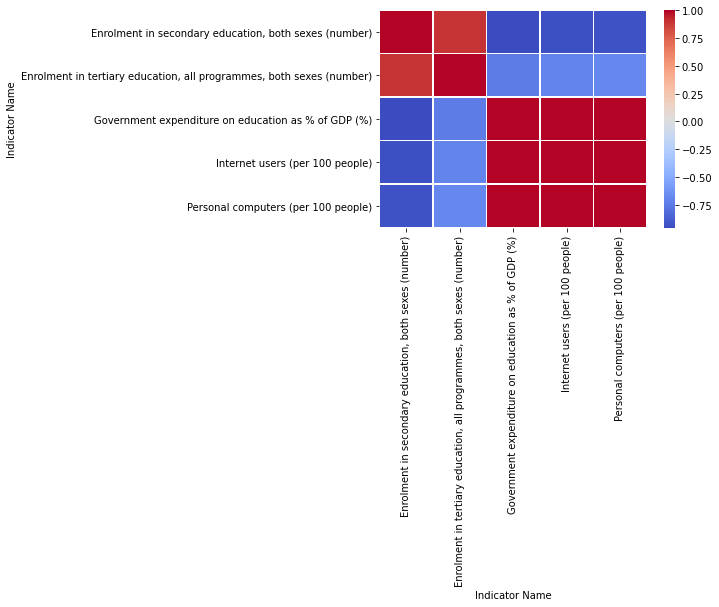

In [56]:
h = sns.heatmap(df_indicateurs_a_supprimer.corr(), linewidth = 0.5, cmap="coolwarm")

## Préparation des jeux de données pour notre analyse graphique

In [57]:
df_agrege['Score'] = np.mean(df_agrege[liste_col], axis = 1)

In [58]:
df_agrege.columns

Index(['index', 'Country Name', 'Moyenne computers', 'Moyenne depenses',
       'Moyenne secondary', 'Moyenne internet', 'Moyenne tertiary', 'Score'],
      dtype='object')

On réintègre les colonnes 'Region' et 'Income Group'

In [59]:
df_score = df_agrege.merge(ed_stats_data[['Country Name', 'Country Code']],\
                           on = 'Country Name', how = 'left').drop_duplicates()

df_score = df_score.merge(ed_stats_country[['Country Code', 'Region', 'Income Group']],\
                          on = 'Country Code', how = 'left').drop_duplicates()

In [60]:
print(df_score.columns,'\n')
print(df_score.shape)

Index(['index', 'Country Name', 'Moyenne computers', 'Moyenne depenses',
       'Moyenne secondary', 'Moyenne internet', 'Moyenne tertiary', 'Score',
       'Country Code', 'Region', 'Income Group'],
      dtype='object') 

(164, 11)


In [61]:
df_score.drop(columns = ['Country Code','index'], inplace = True)

Pour plus de lisibilité, nous renommons nos colonnes de moyennes avec le nom de chaque indicateur.

In [62]:
df_score.rename(columns = {'Moyenne computers' :'Personal computers (per 100 people)',\
                           'Moyenne depenses' : 'Government expenditure on education as % of GDP (%)',\
                           'Moyenne secondary' : 'Enrolment in secondary education, both sexes (number)',\
                           'Moyenne internet' : 'Internet users (per 100 people)',\
                           'Moyenne tertiary' : 'Enrolment in tertiary education, all programmes, both sexes (number)'},\
                inplace=True)

## Analyse graphique

Observons premièrement la distribution des scores totaux pour chaque région (valeurs extrêmes exclues).

In [63]:
liste_indicateurs = ['Personal computers (per 100 people)',\
                     'Government expenditure on education as % of GDP (%)',\
                     'Enrolment in secondary education, both sexes (number)',\
                     'Internet users (per 100 people)',\
                     'Enrolment in tertiary education, all programmes, both sexes (number)']

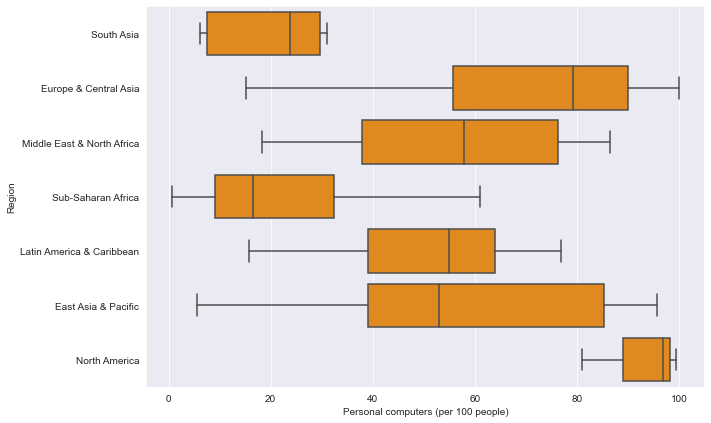

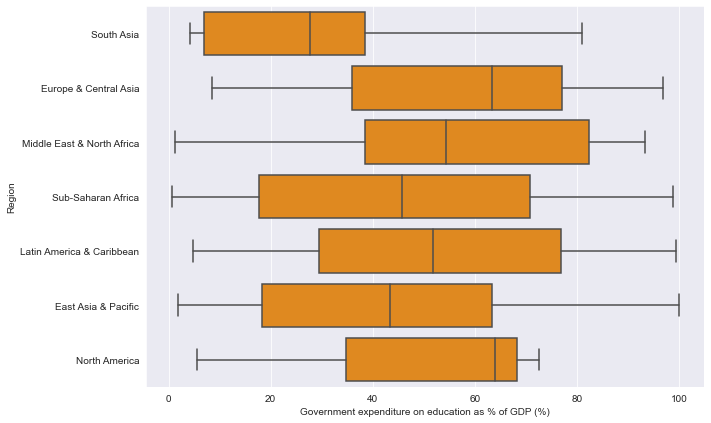

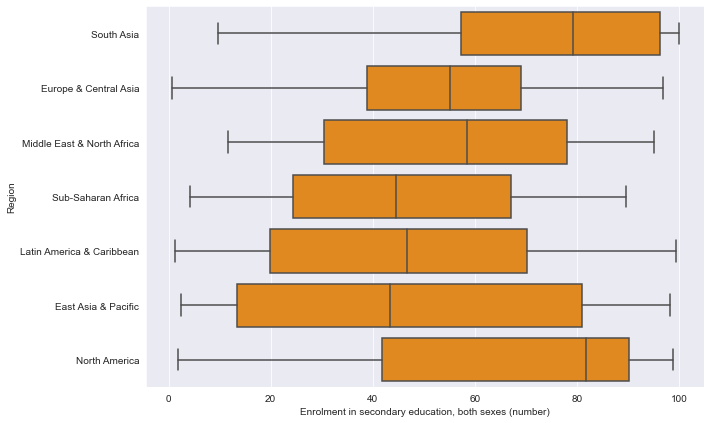

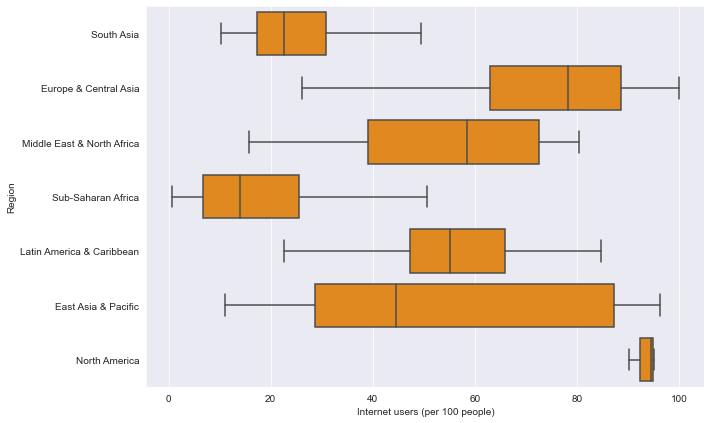

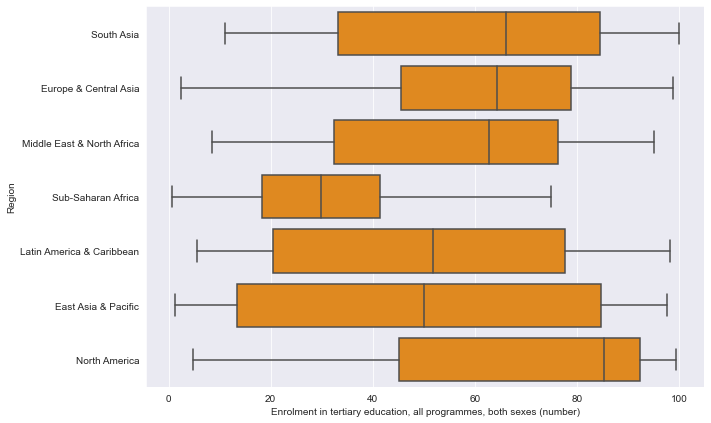

In [64]:
with sns.axes_style("darkgrid"):
    for indicateur in liste_indicateurs:
        plt.figure(figsize=(10, 7))
        sns.boxplot(x = indicateur, y = 'Region', data = df_score, color = 'darkorange', sym = "")
        plt.show()

Observons l'évolution du score des 10 pays ayant le meilleur score en 2015.

In [65]:
df_top_20 = df_score.sort_values(by = 'Score', ascending = False).head(20)
df_top_20_countries = df_top_20.reset_index()

In [66]:
df_evo = df_score_moyen.drop(columns = ['Region', 'Income Group'])

In [67]:
df_evo.set_index('Country Name', inplace = True)

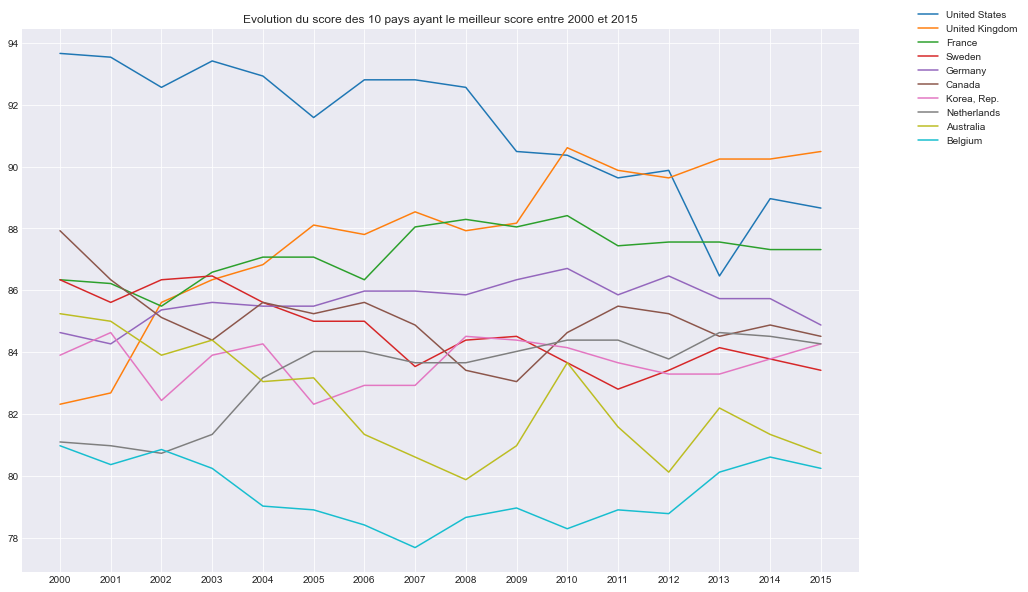

In [83]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes()
plt.title('Evolution du score des 10 pays ayant le meilleur score entre 2000 et 2015')
plt.style.use('seaborn-darkgrid')

for country in df_top_20_countries['Country Name'].head(10):
    ax.plot(df_evo.loc[country], label = country)
    plt.legend(bbox_to_anchor=(1.2, 1.05))

Maintenant, regardons l'évolution du percentile de nos 10 meilleurs pays pour chaque indicateur :

In [69]:
subset_computers.drop(columns = 'Moyenne computers', inplace = True)
subset_gov.drop(columns = 'Moyenne depenses', inplace = True)
subset_secondary.drop(columns = 'Moyenne secondary', inplace = True)
subset_internet.drop(columns = 'Moyenne internet', inplace = True)
subset_tertiary.drop(columns = 'Moyenne tertiary', inplace = True)

In [70]:
subset_computers.name = 'Personal computers (per 100 people)'
subset_gov.name = 'Government expenditure on education as % of GDP (%)'
subset_secondary.name = 'Enrolment in secondary education, both sexes (number)'
subset_internet.name = 'Internet users (per 100 people)'
subset_tertiary.name = 'Enrolment in tertiary education, all programmes, both sexes (number)'

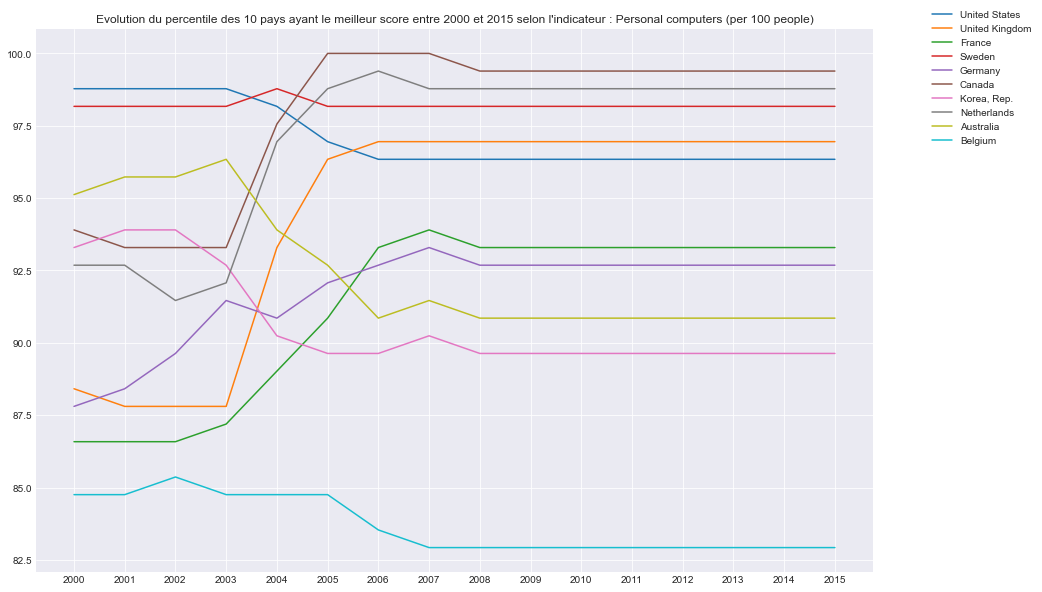

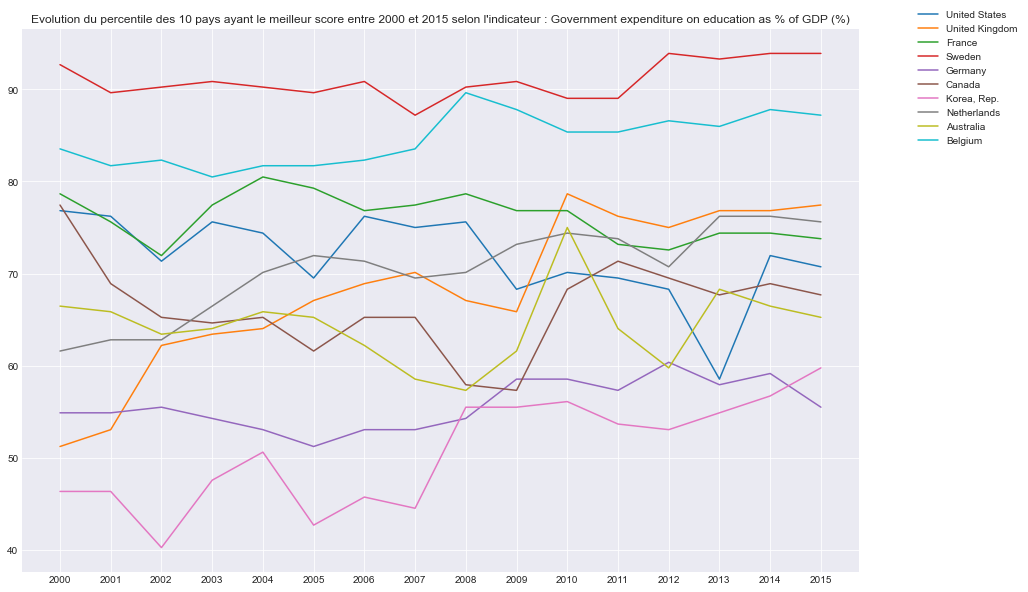

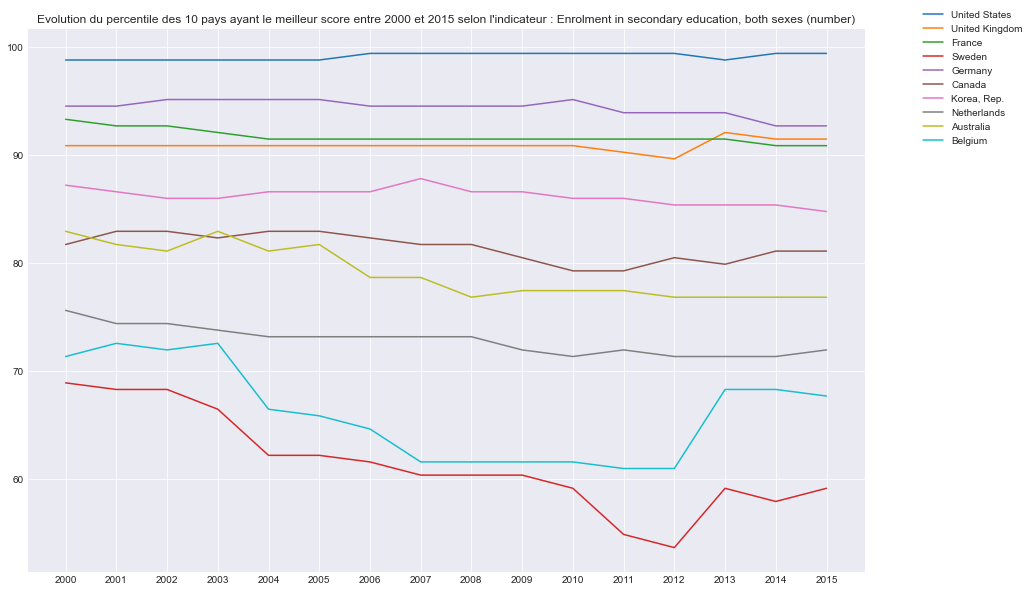

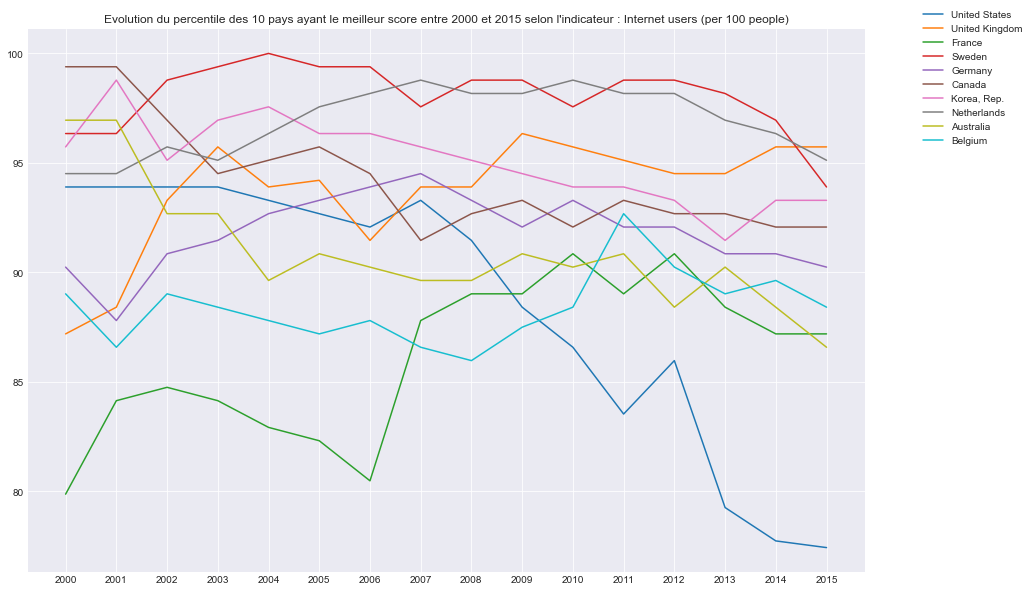

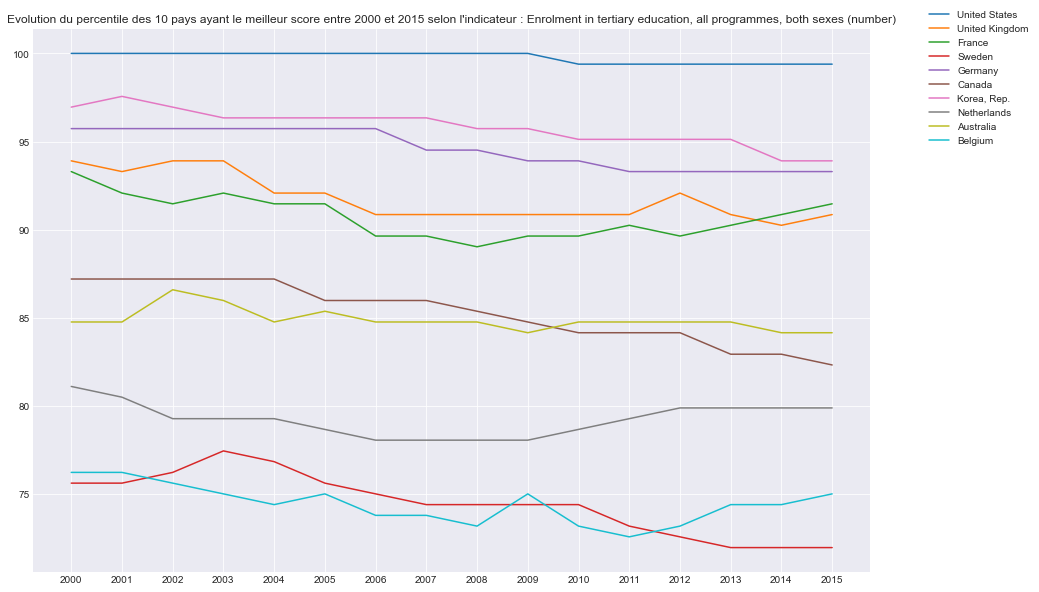

In [71]:
for subset in subsets:
    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes()
    plt.title("Evolution du percentile des 10 pays ayant le meilleur score entre 2000 et 2015 selon l'indicateur : {}"\
              .format(subset.name))
    plt.style.use('seaborn-darkgrid')

    for country in df_top_20_countries['Country Name'].head(10):
        ax.plot(subset.loc[country], label = country)
        plt.legend(bbox_to_anchor=(1.2, 1.05))

Comparons les 20 pays ayant eu le meilleur score en 2015 :

In [72]:
df_top_2015 = df_score_moyen.sort_values('2015', ascending = False).head(20)
df_top_2015_countries = df_top_2015['Country Name']

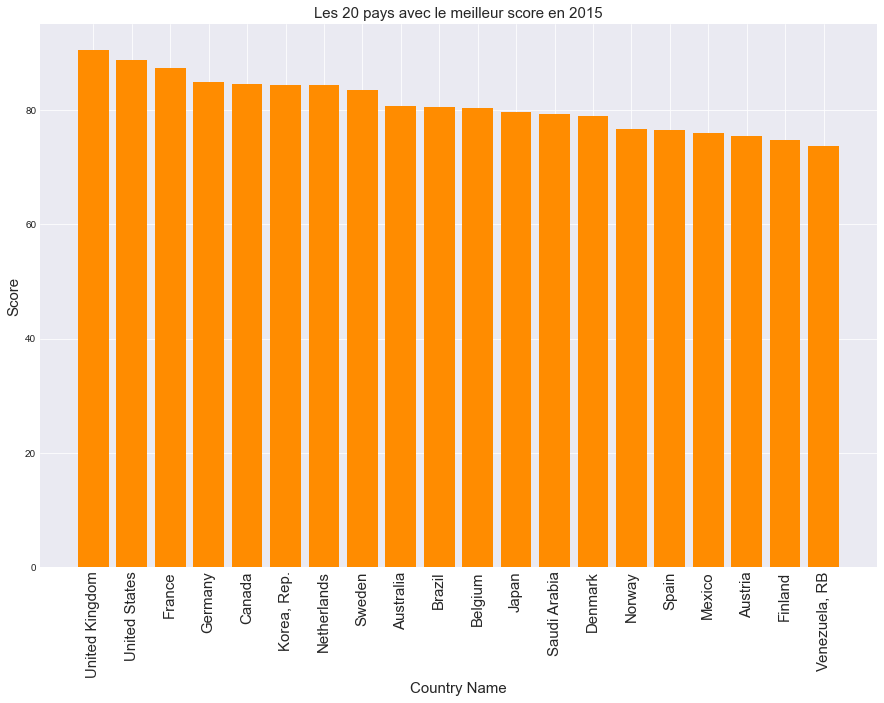

In [73]:
fig,ax = plt.subplots()

fig.set_size_inches([15,10])

ax.bar(df_top_2015['Country Name'], height = df_top_2015['2015'], color = 'darkorange')

ax.set_title('Les 20 pays avec le meilleur score en 2015', fontsize = 15)
ax.set_xlabel('Country Name', fontsize = 15)
ax.set_ylabel('Score', fontsize = 15)
xticks_loc = ax.get_xticks()

ax.xaxis.set_major_locator(mticker.FixedLocator(xticks_loc))

ax.set_xticklabels(df_top_2015_countries, rotation = 90, fontsize = 15)

plt.show()

Observons maintenant l'évolution du score entre 2000 et 2015 pour nos différentes régions du monde.

In [74]:
df_mean_values_region = df_score_moyen.groupby('Region').mean()
df_mean_values_region_bis = df_mean_values_region.reset_index()

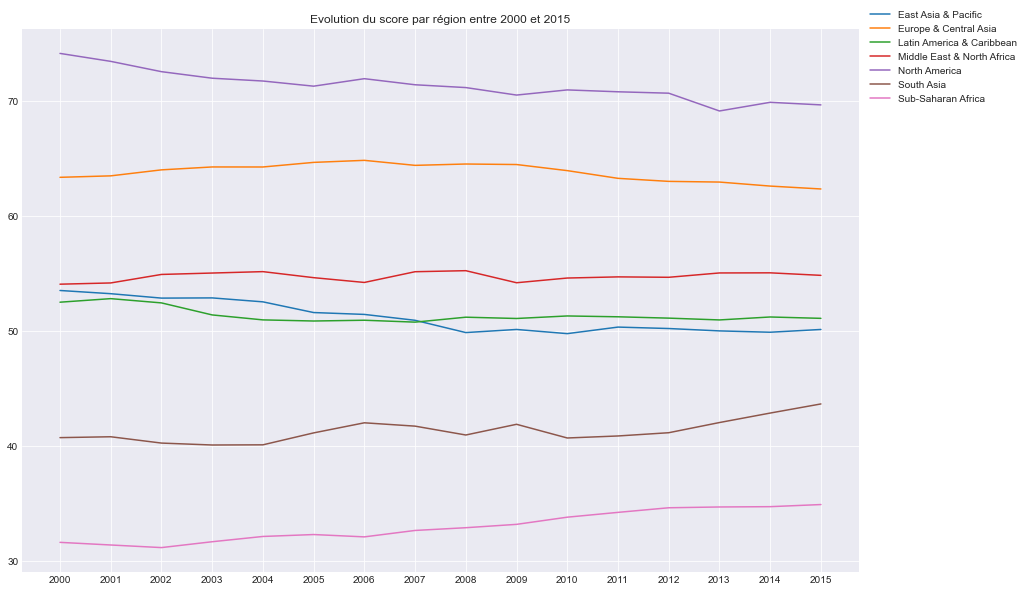

In [75]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes()
plt.title('Evolution du score par région entre 2000 et 2015')

for region in df_mean_values_region_bis['Region'].unique():
    ax.plot(df_mean_values_region.loc[region], label = region)
    plt.legend(bbox_to_anchor=(1.2, 1.05))

Qu'en est-il de l'évolution du score par Income Group entre 2000 et 2015 :

In [76]:
df_mean_values_income = df_score_moyen.groupby('Income Group').mean()
df_mean_values_income_bis = df_mean_values_income.reset_index()

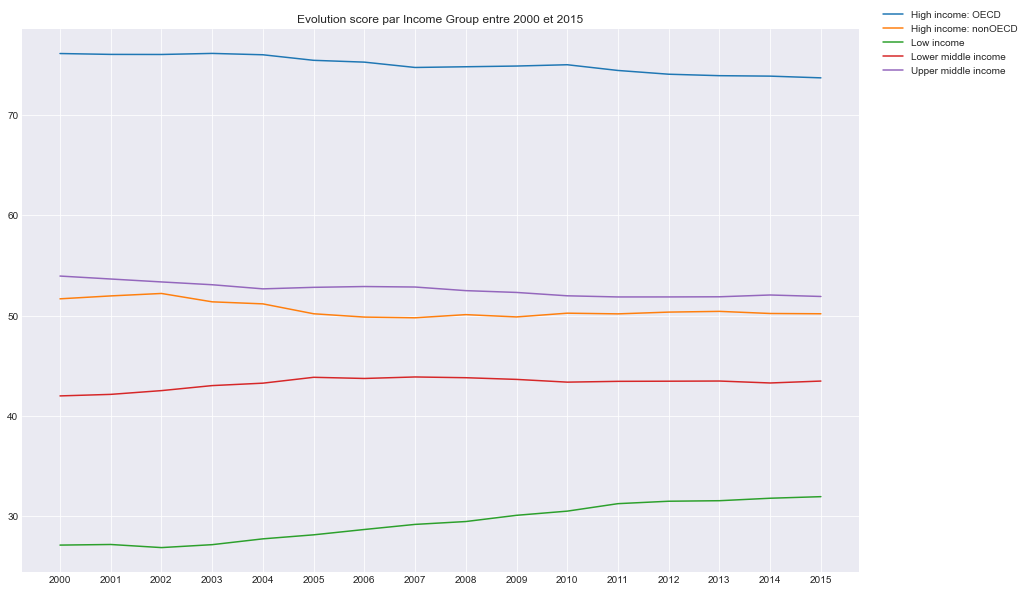

In [77]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes()
plt.title('Evolution score par Income Group entre 2000 et 2015')

for group in df_mean_values_income_bis['Income Group'].unique():
    ax.plot(df_mean_values_income.loc[group], label = group)
    plt.legend(bbox_to_anchor=(1.2, 1.05))

Créons maintenant une carte du monde qui met en avant les 20 pays ayant le meilleur score en 2015.

Pour cela, nous allons devoir réutiliser nos jeux de données initiaux *ed_stats_data* et *ed_stats_country* afin d'obtenir le code à deux lettres de chaque pays.

In [78]:
df_map = df_top_2015[['Country Name','2015']].merge(ed_stats_data[['Country Name','Country Code']],\
                                   on = 'Country Name', how = 'left').drop_duplicates()

df_map = df_map.merge(ed_stats_country[['Country Code', '2-alpha code']],\
                      on = 'Country Code', how = 'left').drop_duplicates()

In [79]:
df_map.head(10)

,Country Name,2015,Country Code,2-alpha code
0,United Kingdom,90.487805,GBR,GB
1,United States,88.658537,USA,US
2,France,87.317073,FRA,FR
3,Germany,84.878049,DEU,DE
4,Canada,84.512195,CAN,CA
5,"Korea, Rep.",84.268293,KOR,KR
6,Netherlands,84.268293,NLD,NL
7,Sweden,83.414634,SWE,SE
8,Australia,80.731707,AUS,AU
9,Brazil,80.487805,BRA,BR


In [80]:
top_countries_values = round(df_map['2015'], 2).tolist()
top_alpha_code = df_map['2-alpha code'].tolist()

top_alpha_code = [x.lower() for x in top_alpha_code]

In [81]:
zip_object = zip(top_alpha_code, top_countries_values)
map_dictionary = dict(zip_object)

print(map_dictionary)

{'gb': 90.49, 'us': 88.66, 'fr': 87.32, 'de': 84.88, 'ca': 84.51, 'kr': 84.27, 'nl': 84.27, 'se': 83.41, 'au': 80.73, 'br': 80.49, 'be': 80.24, 'jp': 79.63, 'sa': 79.27, 'dk': 78.9, 'no': 76.71, 'es': 76.46, 'mx': 75.85, 'at': 75.49, 'fi': 74.63, 've': 73.66}


In [82]:
worldmap =  pygal.maps.world.World()

worldmap.title = 'Les 20 pays avec le meilleur score total'

worldmap.add('Meilleur score de 2015', map_dictionary)


worldmap.render_to_file('mymap.html')